# Linear Regression Assumptions

<b>Objective:</b>
<br>
Build a Linear Regression Model from a Sample Dataset and check the Linear Regression Assumptions of the Model.

Required Packages:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

Read the Dataset

In [2]:
df = pd.read_csv('Desktop/Score.csv')

In [3]:
print ("Total number of rows in dataset = {}".format(df.shape[0]))
print ("Total number of columns in dataset = {}".format(df.shape[1]))

Total number of rows in dataset = 200
Total number of columns in dataset = 4


In [4]:
df.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Test-Train-Split the Dataset

In [5]:
target_col = "Target"

In [6]:
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

In [7]:
# Split the data into train and test with 70% data being used for training
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

# Linear Regression using statsmodels

In [8]:
X_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_constant)

In [9]:
results = model.fit()
results.params

const        2.708949
Feature 1    0.044059
Feature 2    0.199287
Feature 3    0.006882
dtype: float64

In [10]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     434.5
Date:                Wed, 14 Jul 2021   Prob (F-statistic):           1.88e-69
Time:                        19:46:59   Log-Likelihood:                -262.21
No. Observations:                 140   AIC:                             532.4
Df Residuals:                     136   BIC:                             544.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7089      0.374      7.250      0.0

In [11]:
X_test = sm.add_constant(X_test)

In [12]:
y_pred = results.predict(X_test)

In [13]:
residual = y_test - y_pred

# No Multicolinearity

In [14]:
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T

,Feature 1,Feature 2,Feature 3
vif,2.697679,3.473818,3.162643


# Normailty of Residual

<AxesSubplot:ylabel='Density'>

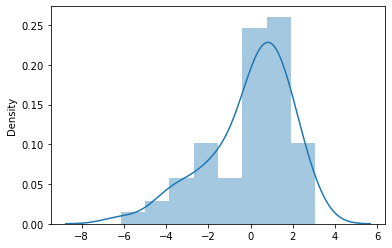

In [15]:
sns.distplot(residual)

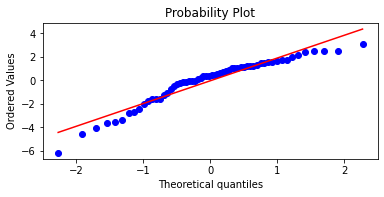

In [16]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

In [17]:
np.mean(residual)

-0.03848895253439519

# Homoscedasticity

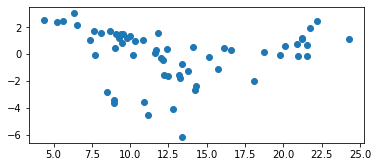

In [18]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)

# No Autocorrelation of Residuals

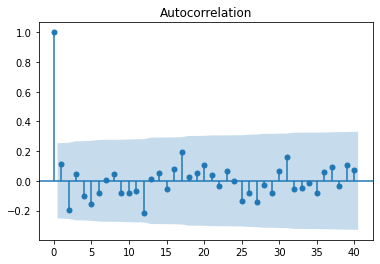

In [19]:
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()